# Market vs Non-Market

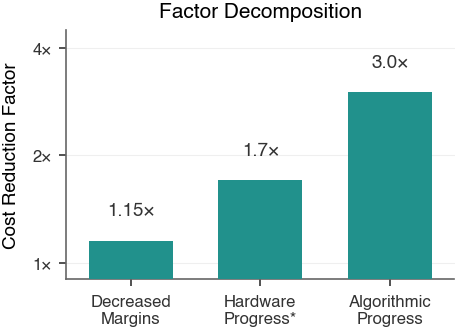

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Reset to default and set up clean Epoch-style aesthetics
plt.style.use('default')
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 8,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.02,
})

# Data - ordered by multiplier size
categories = ['Decreased\nMargins', 'Hardware\nProgress*', 'Algorithmic\nProgress']
multipliers = [1.15, 1.7, 3.0]

# Viridis-inspired colors - all bars same color as Hardware Progress
cmap = mpl.colormaps['viridis']
hardware_color = cmap(0.5)
colors = [hardware_color, hardware_color, hardware_color]

# ICML single column width: 3.25 inches
fig, ax = plt.subplots(figsize=(3.25, 2.4))

# Set y-axis to log scale
ax.set_yscale('log')

# Create clean bars
bars = ax.bar(categories, multipliers, color=colors, 
              edgecolor='none', width=0.65, zorder=3)

# Add value labels on top of each bar
for bar, mult in zip(bars, multipliers):
    # For log scale, use a percentage of the bar height for offset
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.15,
            f'{mult}×', ha='center', va='bottom', 
            fontsize=9, fontweight='bold', color='#333333')

# Clean styling
ax.set_ylabel('Cost Reduction Factor', fontsize=9, labelpad=6)

# Set log scale limits (can't start at 0 for log scale)
ax.set_ylim(0.9, max(multipliers) * 1.5)

# Set custom tick locations at important points: 1x, 2x, 4x
tick_locations = [1.0, 2.0, 4.0]
tick_labels = ['1×', '2×', '4×']
ax.set_yticks(tick_locations)
ax.set_yticklabels(tick_labels)

# IMPORTANT: Disable minor ticks to prevent "3*10^0" from appearing
ax.yaxis.set_minor_locator(plt.NullLocator())

# Subtle horizontal grid only (will show at tick locations)
ax.yaxis.grid(True, linestyle='-', alpha=0.2, linewidth=0.5, zorder=0)
ax.set_axisbelow(True)

# Clean spine styling
ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.tick_params(colors='#333333', width=0.8)

# Tighter x-axis
ax.set_xlim(-0.5, 2.5)
ax.title.set_text('Factor Decomposition')

plt.tight_layout()
plt.savefig('figures/decomposing_inference_progress_icml.pdf', format='pdf')
plt.savefig('figures/decomposing_inference_progress_icml.png', format='png')
plt.show()